https://scikit-learn.org/stable/modules/mixture.html

- I reviewed how to estimate parameters with MLE for two cases/ complete and incomplete.
- I wanna write here2/5

# GMM

- unsupervised
- soft clustering
  - for each data, the model output the probability for which class the data will be in
- parametric 

## components of GMM

- k - the number of gaussian distribution
- $µ_k$ - mean of each k-th gaussian distribution
- $∑_k$ - covariance matrix of k-th component
- $π_k$ - how much each gaussian distribution contributes to the last GMM

**last GMM**

- p(x) = $\sum^{K}_{k=1}π_kN(x | µ_k, ∑_k)$
- $\sum^{K}_{k=1}π_k = 1$

  

##  GMM and marginal distribution of a joint distribuion

- p(x,z) = p(z)p(x/z)
  - z is discrete 1.2.3.4,,,k
- $π_k = p(z = k)$
- $p(x / z = k) = N(x /µ_k, ∑_k)$
- p(x) = $\sum^{K}_{k=1}π_kN(x | µ_k, ∑_k)$

## advantage. 

- captures uncertainty in cluster membership
  - overlapping clusters
- more information during parameter updates
- more robust to noise and outliers.


## disadvantage.

- more complex than k-means


## assumption / inductive bias 

## metrics/ loss function

## hyper parameter 

## data preprocessing before 

## algorithm 

**parameters**

- π
- µ
- ∑
- for all k

**goal**

- maximize likelihood of observed data.

**cases**

1. complete data

    - {x(n), z(n)}
    - z(n) labels for each data
      - latent variable
   
3. incomplete data

   - {x(n)}
### 1. complete data

**log likelihood**

- decomposable 
- $\sum_{n}{log (p(x(n), z(n)))} = \sum_{n}(log(p(z(n))p(x(n)/z(n)))))$
-  == sum of all class (  sum when z(n) = k ( the log of p))

### 2. incomplete data

- have to estimate two things
  - parameters
  - which classes each points belongs to.
 
**how**

- $Y_{nk} = p( Z = k / x )$
- and 
- $\pi_k$
- $µ_k$
- $\Sigma_k$


## implementation 

**data preprocess before**

- feature scaling << GMM is sensitive to scaling
- handling outliers
  - outliers can affect the mean and variance and covariacen matrix
- Dimensionality reduction
  - PCA
  - t-SNE.

**hyper parameter**
- the number of clusters
  - can be decided with AIC/BIC with cross validation.
- Elbow method
- using the other metrics. 

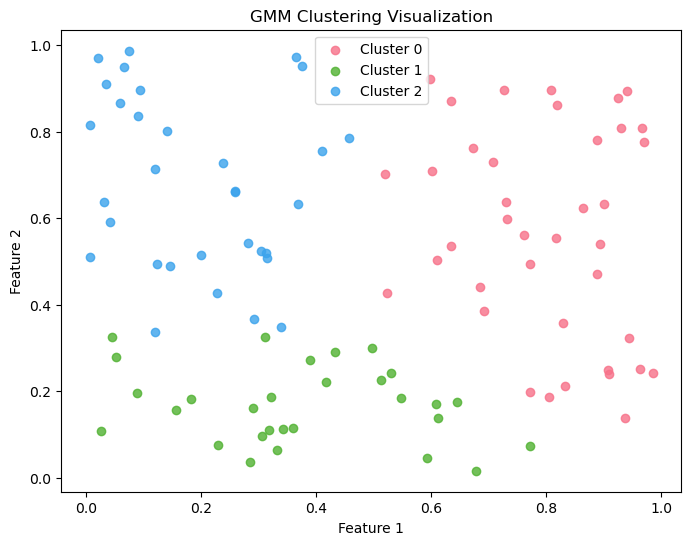

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture

np.random.seed(42)
X = np.random.rand(100, 2)

gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(X)

clusters = gmm.predict(X)
colors = sns.color_palette("husl", n_colors=3) 

plt.figure(figsize=(8, 6))
for i in range(3): 
    plt.scatter(X[clusters == i, 0], X[clusters == i, 1], 
                label=f'Cluster {i}', color=colors[i], alpha=0.8)


plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("GMM Clustering Visualization")
plt.legend()
plt.show()


**check**

- need scaling?
- need to handle outliers?
- dimension reduction?
  - PCA
  - t-SNE.